# Commons

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

In [4]:
def plotForOneResult(x_labelData, y_labelData, x_label='', y_label='', labelName='', title='', symbolToPlot='b', isShow=False):
    plt.plot(x_labelData, y_labelData, symbolToPlot, label=labelName)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    if isShow:
        plt.show()

def plotForTwoResults(x_data, y1_data, y2_data, x_label='', y_label='', y1_label='', y2_label='', title='', isLegend=True, isShow=False, isGrid = True):
    plt.plot(x_data, y1_data, label=y1_label)
    plt.plot(x_data, y2_data, label=y2_label)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    if isLegend:
        plt.legend()
    if isShow:
        plt.show()

In [5]:
def plot_for_one_model(history, isValidation=False, is_save=False, location=""):

    epochs = range(1, len(history.history['loss']) + 1)

    training_loss = history.history['loss']
    training_accuracy = history.history["acc"]
    plt.figure(figsize=(12, 4))


    if isValidation:
        validation_loss = history.history["val_loss"]
        validation_accuracy = history.history["val_acc"]

        plt.subplot(1, 2, 1)

        plotForTwoResults(
            epochs,
            training_loss,
            validation_loss,
            x_label="Epochs",
            y_label="Losses",
            y1_label="Training Loss",
            y2_label="Validation_Loss",
            title="Training and Validation Loss",
            isShow=False
        )

        plt.subplot(1, 2, 2)

        plotForTwoResults(
            epochs,
            training_accuracy,
            validation_accuracy,
            x_label="Epochs",
            y_label="Accuracies",
            y1_label="Training_Accuracy",
            y2_label="Validation_Accuracy",
            title="Training and Validation Accuracy",
            isShow=False
        )

    else:
        plt.subplot(1, 2, 1)
        plotForOneResult(
            epochs,
            training_loss,
            x_label="Epochs",
            y_label="Training_Loss",
            title="Training_Loss",
            isShow=False
        )
        plt.subplot(1, 2, 2)
        plotForOneResult(
            epochs,
            training_accuracy,
            x_label="Epochs",
            y_label="Training_Accuracy",
            title="Training_Accuracy",
            isShow=False
        )

    if is_save:
        if location:
            if os.path.exists(location):
                os.remove(location)
            plt.savefig(location)
        else:
            raise Exception("valid location is required")
    plt.show()

    plt.show()

def plot_for_two_model(history1, history2, isValidation=False, with_combined=False):
    training_loss1 = history1.history['loss']
    training_accuracy1 = history1.history['acc']
    training_loss2 = history2.history['loss']
    training_accuracy2 = history2.history['acc']
    plt.figure(figsize=(12, 10))

    if with_combined:
        epochs = range(1, len(history1.history['loss']) + 1)
        plt.subplot(2, 2, 1)
        plotForTwoResults(
            epochs,
            training_loss1,
            training_loss2,
            x_label="Epochs",
            y_label="Losses",
            y1_label="Training Loss_1",
            y2_label="Training Loss_2",
            title="Training Losses for Model_1 and Model_2"
        )

        plt.subplot(2, 2, 2)

        plotForTwoResults(
            epochs,
            training_accuracy1,
            training_accuracy2,
            x_label="Epochs",
            y_label="Accuracies",
            y1_label="Training Accuracy_1",
            y2_label="Training Accuracy_2",
            title="Training Accuracies for Model_1 and Model_2"
        )

        if isValidation:
            validation_loss1 = history1.history['val_loss']
            validation_accuracy1 = history1.history['val_acc']

            validation_loss2 = history2.history['val_loss']
            validation_accuracy2 = history2.history['val_acc']

            plt.subplot(2, 2, 3)

            plotForTwoResults(
                epochs,
                validation_loss1,
                validation_loss2,
                x_label="Epochs",
                y_label="Losses",
                y1_label="Validation Loss_1",
                y2_label="Validation Loss_2",
                title="Validation Losses for Model_1 and Model_2"
            )

            plt.subplot(2, 2, 4)

            plotForTwoResults(
                epochs,
                validation_accuracy1,
                validation_accuracy2,
                x_label="Epochs",
                y_label="Accuracies",
                y1_label="Validation Accuracy_1",
                y2_label="Validation Accuracy_2",
                title="Validation Accuracies for Model_1 and Model_2")
    else:

        epochs_1 = range(1, len(history1.history['val_loss']) + 1)
        epochs_2 =range(1, len(history2.history['val_loss']) + 1)

        if isValidation:

            validation_loss1 = history1.history['val_loss']
            validation_accuracy1 = history1.history['val_acc']

            validation_loss2 = history2.history['val_loss']
            validation_accuracy2 = history2.history['val_acc']

            plt.subplot(2, 2, 1)

            plotForTwoResults(
                epochs_1,
                training_loss1,
                validation_loss1,
                x_label="Epochs",
                y_label="Losses",
                y1_label="Training Loss_1",
                y2_label="Validation Loss_1",
                title="Training and Validation Losses for Model_1"
            )


            plt.subplot(2, 2, 2)

            plotForTwoResults(
                epochs_1,
                training_accuracy1,
                validation_accuracy1,
                x_label="Epochs",
                y_label="Accuracies",
                y1_label="Training Accuracy_1",
                y2_label="Validation Accuracy_1",
                title="Training and Validation Accuracies for Model_1"
            )

            plt.subplot(2, 2, 3)

            plotForTwoResults(
                epochs_1,
                training_loss2,
                validation_loss2,
                x_label="Epochs",
                y_label="Losses",
                y1_label="Training Loss_2",
                y2_label="Validation Loss_2",
                title="Training and Validation Losses for Model_2"
            )

            plt.subplot(2, 2, 4)

            plotForTwoResults(
                epochs_1,
                training_accuracy2,
                validation_accuracy2,
                x_label="Epochs",
                y_label="Accuracies",
                y1_label="Training Accuracy_2",
                y2_label="Validation Accuracy_2",
                title="Training and Validation Accuracies for Model_2"
            )
    plt.show()

In [6]:
def plot_for_multiple_models(histories):
    histories = [history.history for history in histories]

    fig_size = (12, 10)  # Width, Height
    epochs = range(1, len(histories[0]["loss"]) + 1)
    fig, axs = plt.subplots(2, 2, figsize=fig_size)  # Creating a 2x2 grid of subplots
    for (i, history) in enumerate(histories):
        training_loss = history['loss']
        training_acc = history['acc']
        validation_loss = history['val_loss']
        validation_acc = history['val_acc']
        label_name = "Model-" + str(i + 1)
        axs[0, 0].plot(epochs, training_loss, label=label_name)
        axs[0, 1].plot(epochs, training_acc, label=label_name)
        axs[1, 0].plot(epochs, validation_loss, label=label_name)
        axs[1, 1].plot(epochs, validation_acc, label=label_name)

    titleNames = [["Training Losses", "Traning Accuracies",], ["Validation Losses", "Validation Accuracies"]]

    for i in range(2):
        for j in range(2):
            axs[i, j].grid(True)
            axs[i, j].legend()
            axs[i, j].set_title(titleNames[i][j])
    plt.show()

def plot_val_accuracies(histories):
    print("Average Validation Accuracies\n")
    plt.figure(figsize=(18, 6))
    histories = [history.history for history in histories]
    epochs = range(1, len(histories[0]['val_acc']) + 1)
    val_accuracies = [history['val_acc'] for history in histories]
    avg_val_accuracies = [sum(val_accs) / len(histories[0]['val_acc']) for val_accs in val_accuracies]
    for i, avg_acc in enumerate(avg_val_accuracies):
        print(f"Model-{i + 1}: {avg_acc}")
    for i, val_acc in enumerate(val_accuracies):
        plt.plot(epochs, val_acc, label=f'Model-{i + 1}')

    plt.grid(True)
    plt.legend()
    plt.title("Validation Accuracies for all Models")
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")

def plot_detailed_val_accuracies(histories):
    if len(histories) > 3:
        plot_val_accuracies(histories[:3])
        plot_val_accuracies(histories[3:])
    else:
        plot_val_accuracies(histories)

def plot_semilog_data(histories, starts=None):
    total_histories = len(histories)
    if not starts:
        starts = [0] * total_histories
    if total_histories == 1:
        start = starts[0]
        loss = histories[0].history["loss"]
        lrs = 1e-8 * (10 ** (np.arange(starts[0], len(loss)) / 20))
        plot_for_one_semilog_data(lrs, loss[start:])
        return

    plt_dim_rows = (total_histories + 2) // 3  # Calculate the number of rows
    plt_dim_cols = min(total_histories, 3)  # Maximum of 3 columns
    fig_size = (26, plt_dim_rows * 5)  # Adjusted height based on plt_dim_rows
    fig, axs = plt.subplots(plt_dim_rows, plt_dim_cols, figsize=fig_size)  # Adjusted subplot layout

    for i, history in enumerate(histories):
        x = i // plt_dim_cols
        y = i % plt_dim_cols
        loss = history.history['loss']
        start = starts[i]
        lrs = 1e-8 * (10 ** (np.arange(start, len(loss)) / 20))
        if plt_dim_rows > 1:
            axs[x, y].semilogx(lrs, loss[start:])
            axs[x, y].grid(True)
            axs[x, y].set_xlabel("Learning rate")
            axs[x, y].set_ylabel("Loss")
            axs[x, y].set_title(f'Learning_Rate Vs Loss for Model-{i + 1}')
            axs[x, y].tick_params('both', length=10, width=1, which='both')

        else:
            print(i, start)
            axs[i].semilogx(lrs, loss[start:])
            axs[i].grid(True)
            axs[i].set_xlabel("Learning rate")
            axs[i].set_ylabel("Loss")
            axs[i].set_title(f'Learning_Rate Vs Loss for Model-{i + 1}')
            axs[i].tick_params('both', length=10, width=1, which='both')
    plt.axis([1e-8, 1e-3, 0, len(loss)])  # Adjust axis limits as needed
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

def plot_for_one_semilog_data(x_data, y_data, start=0):
    # lrs = 1e-8 * (10 ** (np.arange(start, 100) / 20))
    plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.semilogx(x_data, y_data)
    plt.tick_params('both', length=10, width=1, which='both')
    plt.title("Learning_Rate Vs Loss")
    plt.xlabel("Learning_rate")
    plt.ylabel("Loss")

In [7]:
def train_multiple_models(models, x_train, y_train, x_valid, y_valid, epochs=20, verbose=0, batch_size=128):
    histories = []
    final_model = None
    final_max_val_acc = 0
    max_model_index = 0

    for i, model in enumerate(models):
        st = time.time()
        num_epochs = epochs[i] if type(epochs) is list else epochs

        print
        (f"Training Model: {i + 1}")
        history = model.fit(
            x_train,
            y_train,
            epochs=epochs,
            batch_size=128,
            verbose=verbose,
            validation_data=(x_valid, y_valid)
        )

        print(f"Completed Training Model: {i + 1}")
        en = time.time()
        print(f"Executed time: {(en - st) / 1000}")

        histories.append(history)

        max_val_acc = max(history.history['val_acc'])

        print(f"Maximum Validation Accuracy: {max_val_acc}")
        print(f"Actual Validation Accuracy: {final_max_val_acc}")

        print()

        if max_val_acc > final_max_val_acc:
            final_max_val_acc = max_val_acc
            final_model = model
            max_model_index = i

    print(f"model{max_model_index + 1} may be a good model")
    return histories

In [8]:
def evaluate_models(models, x_test, y_test):
    results = [0] * len(models)
    for i, model in enumerate(models):
        print(f"Evaluating Model-{i}")
        result = model.evaluate(x_test, y_test)
        results[i] = result

    return results

In [9]:
class MyCallback(tf.keras.callbacks.Callback):

    def __init__(self):
        self.all_model_weights = []
        self.all_logs = []
        self.eff_model_weights = None
        self.max_val_acc = 0
        self.logs = None
        self.epochs = None

    def on_epoch_end(self, epochs, logs={}):
        print()
        self.all_model_weights.append(self.model.get_weights())
        self.all_logs.append(logs)
        if logs.get("val_acc") > self.max_val_acc:
            self.max_val_acc = logs.get("val_acc")
            self.eff_model_weights = self.model.get_weights()
            self.logs = logs
            self.epochs = epochs
            print(f"max_val_acc changed at epoch: {epochs}")

        print(f"Val_Accuracy at epoch {epochs}: {logs.get('val_acc')}")
        print(f"Maximum Val_Accuracy at epoch {epochs}: {self.max_val_acc}")


    def get_efficient_model_weights(self):
        return self.eff_model_weights

    def max_efficient_logs(self):
        return self.logs

    def get_all_logs(self):
        return self.all_logs

    def get_all_model_weights(self):
        return self.all_models_weights

# Trainig model


**Using Machine Learning Algorithms**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = "/content/train.csv"

df = pd.read_csv(file_path)

df_copy = df.copy()

df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Cleaning the dataset

In [10]:
# setting 'PassengerId' as index
df.set_index('PassengerId', inplace=True)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
if {'Name', 'Ticket', 'Cabin'}.issubset(df.columns):
  df.drop(['Name', 'Ticket', 'Cabin'], inplace=True, axis=1)


df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df[df['Embarked'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
62,1,1,female,38.0,0,0,80.0,NaN
830,1,1,female,62.0,0,0,80.0,NaN


Text(0.5, 1.0, 'Sex vs Survived')

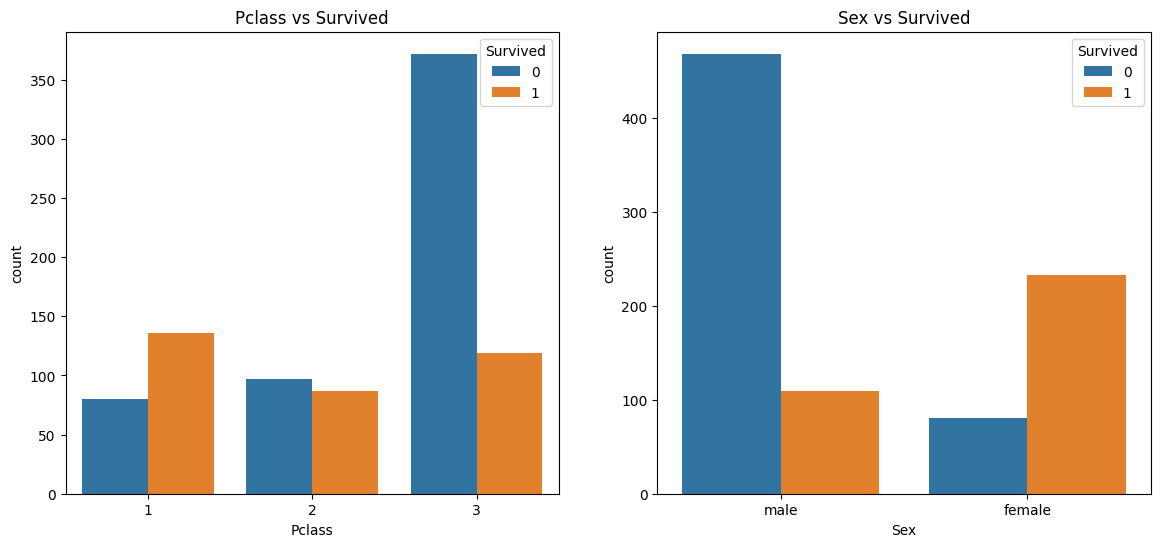

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(df, x='Pclass', hue='Survived', ax=axes[0])
axes[0].set_title('Pclass vs Survived')

sns.countplot(df, x='Sex', hue='Survived', ax=axes[1])
axes[1].set_title('Sex vs Survived')

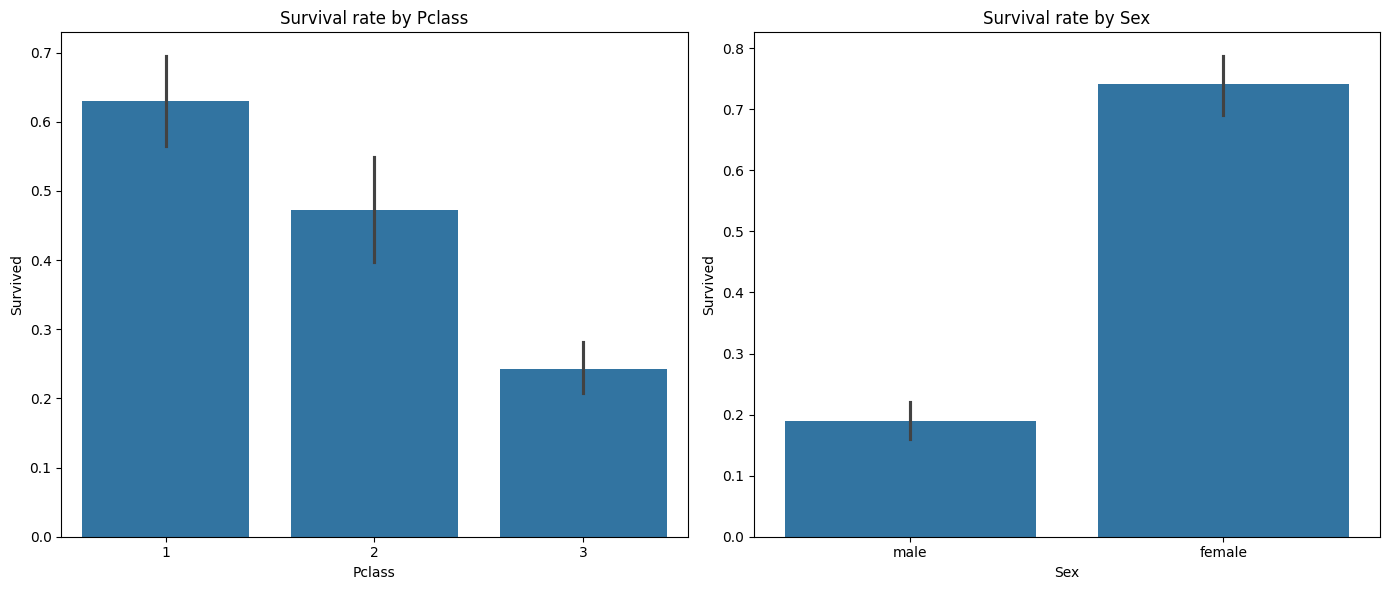

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for 'Pclass' vs mean 'Survived'
sns.barplot(data=df, x='Pclass', y='Survived', ax=axes[0])
axes[0].set_title('Survival rate by Pclass')

# Bar plot for 'Sex' vs mean 'Survived'
sns.barplot(data=df, x='Sex', y='Survived', ax=axes[1])
axes[1].set_title('Survival rate by Sex')

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()


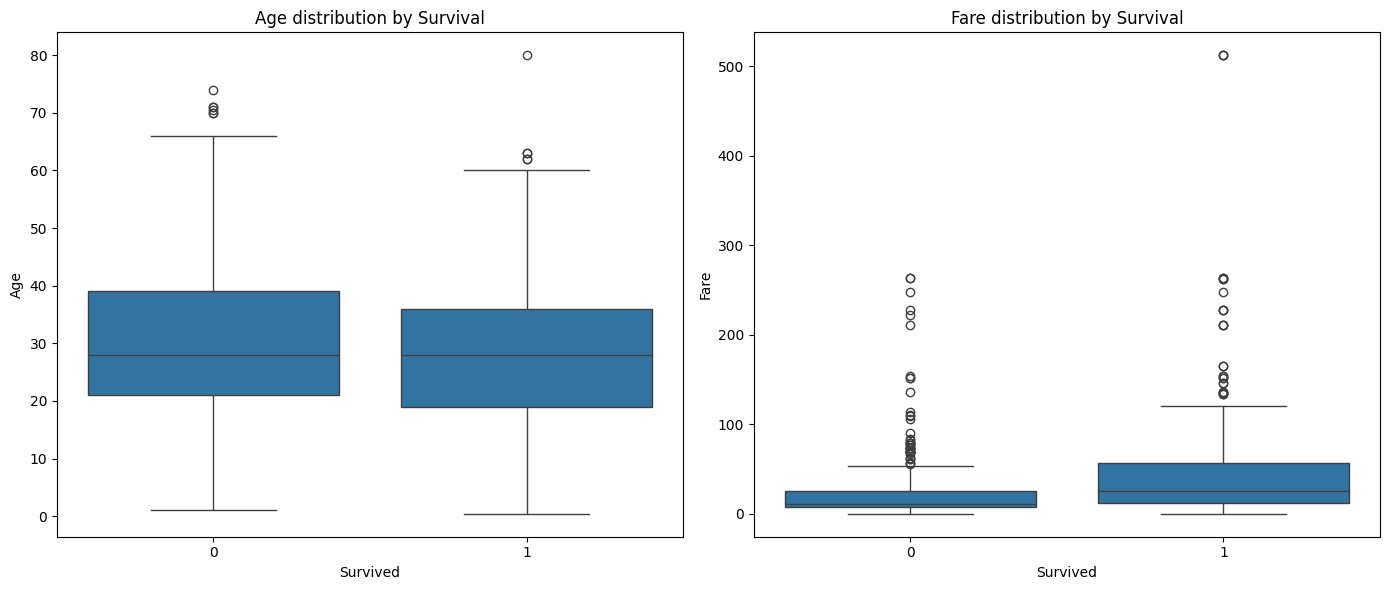

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for 'Age' vs 'Survived'
sns.boxplot(data=df, x='Survived', y='Age', ax=axes[0])
axes[0].set_title('Age distribution by Survival')


# Box plot for 'Fare' vs 'Survived'
sns.boxplot(data=df, x='Survived', y='Fare', ax=axes[1])
axes[1].set_title('Fare distribution by Survival')

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()



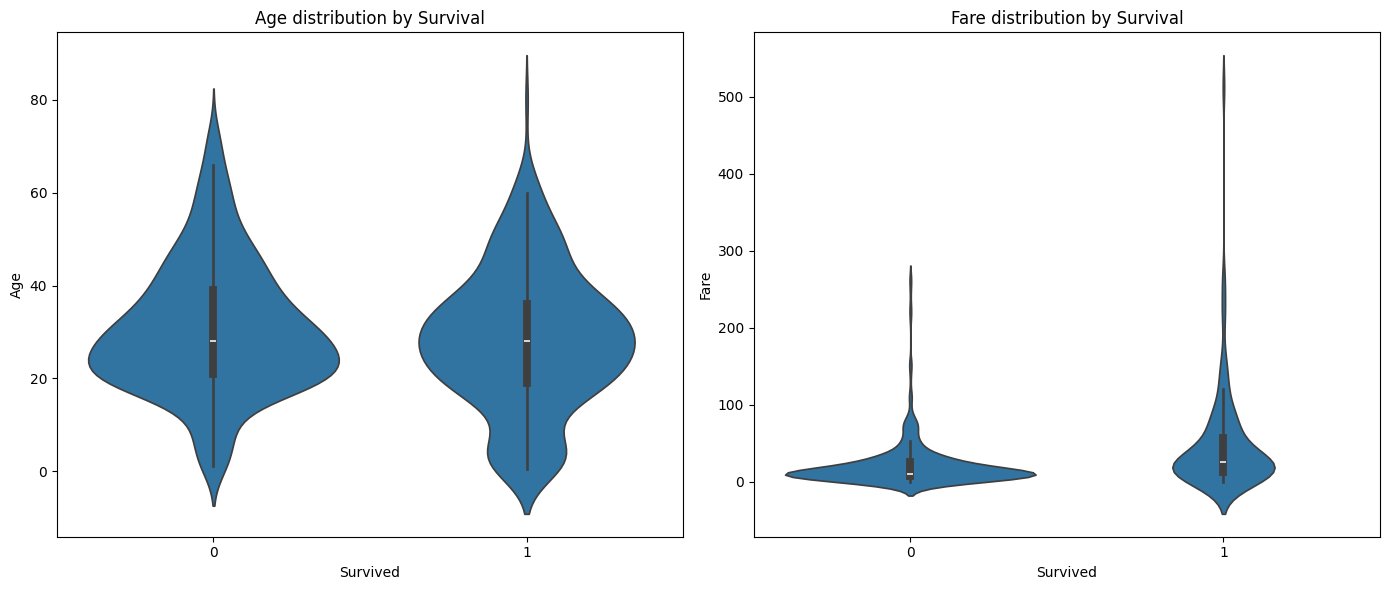

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.violinplot(data=df, x='Survived', y='Age', ax=axes[0])
axes[0].set_title('Age distribution by Survival')

sns.violinplot(data=df, x='Survived', y='Fare', ax=axes[1])
axes[1].set_title('Fare distribution by Survival')

plt.tight_layout()
plt.show()

In [ ]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
# Filling missing values of 'Age' Column
age_grouped_mean = df.groupby(['Pclass', 'Sex'])['Age'].transform('mean')

df['Age'] = df['Age'].fillna(age_grouped_mean)

df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
# Removnig missing value rows
df.dropna(inplace=True)

df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

df['Sex'].unique()

array([1, 0])

In [ ]:
def replace_embarked(embarked):
    if embarked == 'S':
        return 0
    elif embarked == 'C':
        return 1
    elif embarked == 'Q':
        return 2
    else:
        return embarked

df['Embarked'] = df['Embarked'].apply(replace_embarked)

df['Embarked'].unique()

array([0, 1, 2])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


In [ ]:
df.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,0.127741,-0.404114,0.081656,0.016824,-0.548193,0.043835
Sex,0.127741,1.000000,0.118279,-0.116348,-0.247508,-0.179958,-0.118593
Age,-0.404114,0.118279,1.000000,-0.250629,-0.179747,0.115477,-0.047004
SibSp,0.081656,-0.116348,-0.250629,1.000000,0.414542,0.160887,-0.060606
Parch,0.016824,-0.247508,-0.179747,0.414542,1.000000,0.217532,-0.079320
Fare,-0.548193,-0.179958,0.115477,0.160887,0.217532,1.000000,0.063462
Embarked,0.043835,-0.118593,-0.047004,-0.060606,-0.079320,0.063462,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,-0.549253,1,0,-0.500240,0
2,1,1,0,0.659206,1,0,0.788947,1
3,1,3,0,-0.247139,0,0,-0.486650,0
4,1,1,0,0.432620,1,0,0.422861,0
5,0,3,1,0.432620,0,0,-0.484133,0


In [ ]:
if 'Survived' in df.columns:
    survived = df.pop('Survived')

survived.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [ ]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,-0.549253,1,0,-0.500240,0
2,1,0,0.659206,1,0,0.788947,1
3,3,0,-0.247139,0,0,-0.486650,0
4,1,0,0.432620,1,0,0.422861,0
5,3,1,0.432620,0,0,-0.484133,0


In [ ]:
# X_train, X_test, y_train, y_test ==> Unbalanced data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, survived, test_size=0.2, random_state=42)

In [ ]:
# model1 ==> Unbalanced data trained with Logistic Regression
# score1 ==> Accuracy Score for model1

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model1 = LogisticRegression()

model1.fit(X_train, y_train)

score1 = model1.score(X_test, y_test)

print("          model1            \n")

print("Accuracy Score: ", score1)

predict = model1.predict(X_test)

print("Classification Report: \n", classification_report(y_test, predict))
print("Confusion Matrix: \n", confusion_matrix(y_test, predict))

          model1            

Accuracy Score:  0.8146067415730337
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       109
           1       0.74      0.80      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178

Confusion Matrix: 
 [[90 19]
 [14 55]]


In [ ]:
if not 'Survived' in df.columns:
    df['Survived'] = survived

# OverSampling data
from sklearn.utils import resample

df_minority = df[df['Survived'] == 1]
df_majority = df[df['Survived'] == 0]

df_minority_unsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

df_balanced = pd.concat([df_majority, df_minority_unsampled])

df_balanced['Survived'].value_counts()

,count
Survived,
0,549
1,549


In [ ]:
if 'Survived' in df_balanced.columns:
    survival_balanced = df_balanced.pop('Survived')

df_balanced.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,-0.549253,1,0,-0.500240,0
5,3,1,0.432620,0,0,-0.484133,0
6,3,1,-0.208801,0,0,-0.475913,2
7,1,1,1.867664,0,0,0.397946,0
8,3,1,-2.059827,3,1,-0.221900,0


In [ ]:
# X_train1, X_test1, y_train1, y_test1 --> Split train and test data after balancing


X_train1, X_test1, y_train1, y_test1 = train_test_split(df_balanced, survival_balanced, test_size=0.2, random_state=42)

# X_train1 = X_train1[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]
# X_test1 = X_test1[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]

In [ ]:
# model2 ==> balanced data trained with Logistic Regression
# score2 ==> Accuracy Score for model2

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model2 = LogisticRegression()

model2.fit(X_train1, y_train1)

score2 = model2.score(X_test1, y_test1)

print("          model2            \n")

print("Accuracy Score: ", score2)

predict2 = model2.predict(X_test1)

print("Classification Report: \n", classification_report(y_test1, predict2))
print("Confusion Matrix: \n", confusion_matrix(y_test1, predict2))

          model2            

Accuracy Score:  0.8363636363636363
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       119
           1       0.84      0.79      0.82       101

    accuracy                           0.84       220
   macro avg       0.84      0.83      0.83       220
weighted avg       0.84      0.84      0.84       220

Confusion Matrix: 
 [[104  15]
 [ 21  80]]


In [ ]:
# model3 ==> balanced data trained with RandomForestClassifier Regression
# score3 ==> Accuracy Score for model3

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model3 = RandomForestClassifier(n_estimators=100, random_state=42)

model3.fit(X_train1, y_train1)

score3 = model3.score(X_test1, y_test1)

print("          model3            \n")

print("Accuracy Score: ", score3)

predict3 = model3.predict(X_test1)

print("Classification Report: \n", classification_report(y_test1, predict3))
print("Confusion Matrix: \n", confusion_matrix(y_test1, predict3))

          model3            

Accuracy Score:  0.8636363636363636
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       119
           1       0.83      0.88      0.86       101

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.87      0.86      0.86       220

Confusion Matrix: 
 [[101  18]
 [ 12  89]]


In [ ]:
print(f"shape of X_train_balanced: {X_train1.shape}")
print(f"shape of X_test1: {X_test1.shape}")
print(f"shape of y_train1: {y_train1.shape}")
print(f"shape of y_test1: {y_test1.shape}")

shape of X_train_balanced: (878, 7)
shape of X_test1: (220, 7)
shape of y_train1: (878,)
shape of y_test1: (220,)


**Using Neural Networks**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math

import tensorflow as tf
from tensorflow.keras.utils import img_to_array, load_img

tf.random.set_seed(42)

In [ ]:
BATCH_SIZE = 32


# Remodel data according to BATCH_SIZE
def reshape_data(data, batch_size):
    data = np.array(data)
    data = data[:(data.shape[0] // batch_size) * batch_size]
    if len(data.shape) == 2:
        return data.reshape(data.shape[0] // batch_size, batch_size, data.shape[1])
    return data.reshape(data.shape[0] // batch_size, batch_size, )

X_train2 = reshape_data(X_train1, BATCH_SIZE)
X_test2 = reshape_data(X_test1, BATCH_SIZE)

y_train2 = reshape_data(y_train1, BATCH_SIZE)
y_test2 = reshape_data(y_test1, BATCH_SIZE)

print(f"shape of X_train2: {X_train2.shape}")
print(f"shape of X_test2: {X_test2.shape}")
print(f"shape of y_train2: {y_train2.shape}")
print(f"shape of y_test2: {y_test2.shape}")

shape of X_train2: (27, 32, 7)
shape of X_test2: (6, 32, 7)
shape of y_train2: (27, 32)
shape of y_test2: (6, 32)


In [ ]:
# test_model

import tensorflow as tf

model4 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape= (7,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model4.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history1 = model4.fit(X_test1, y_test1, epochs=50, batch_size=BATCH_SIZE, validation_data=(X_test1, y_test1))

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.2745 - loss: 0.7326 - val_accuracy: 0.2818 - val_loss: 0.7143
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3027 - loss: 0.7092 - val_accuracy: 0.3545 - val_loss: 0.7012
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4864 - loss: 0.6952 - val_accuracy: 0.5682 - val_loss: 0.6903
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6203 - loss: 0.6832 - val_accuracy: 0.5864 - val_loss: 0.6801
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6637 - loss: 0.6717 - val_accuracy: 0.6136 - val_loss: 0.6705
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6784 - loss: 0.6608 - val_accuracy: 0.6318 - val_loss: 0.6612
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6824 - loss: 0.6503 - val_accuracy: 0.6545 - val_loss: 0.6524
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7122 - loss: 0.6404 - val_accuracy: 0.6500 - val_loss: 0.6435
Epoch 

In [ ]:
n_models = 4

models = [0] * n_models

for i in range(n_models):
    layers = [tf.keras.layers.Input(shape=(7, ))]
    layers.append(tf.keras.layers.Dense(16, activation='relu'))
    if i > 0:
        layers.append(tf.keras.layers.Dense(16, activation='relu'))
    if i > 1:
        layers.append(tf.keras.layers.Dense(16, activation='relu'))
    if i > 2:
        layers.append(tf.keras.layers.Dense(16, activation='relu'))
    layers.append(tf.keras.layers.Dense(1, activation='sigmoid'))

    model = tf.keras.models.Sequential(layers)
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

    print(f"Summary of model{1} is: \n")
    model.summary()

    models[i] = model

Summary of model1 is: 



Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_152 (Dense)                    │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_153 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 145 (580.00 B)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

Summary of model1 is: 



Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_154 (Dense)                    │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_155 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_156 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

Summary of model1 is: 



Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_157 (Dense)                    │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_158 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_159 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_160 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 689 (2.69 KB)

 Trainable params: 689 (2.69 KB)

 Non-trainable params: 0 (0.00 B)

Summary of model1 is: 



Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_161 (Dense)                    │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_162 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_163 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_164 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_165 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
histories = train_multiple_models(
    models=models,
    x_train=X_train1,
    y_train=y_train1,
    x_valid=X_test1,
    y_valid=y_test1,
    epochs=50,
    batch_size=BATCH_SIZE,
    verbose=0
)

Completed Training Model: 1
Executed time: 0.007245999813079834
Maximum Validation Accuracy: 0.8681818246841431
Actual Validation Accuracy: 0

Completed Training Model: 2
Executed time: 0.007144829988479614
Maximum Validation Accuracy: 0.8636363744735718
Actual Validation Accuracy: 0.8681818246841431

Completed Training Model: 3
Executed time: 0.005184863328933716
Maximum Validation Accuracy: 0.8500000238418579
Actual Validation Accuracy: 0.8681818246841431

Completed Training Model: 4
Executed time: 0.006146508455276489
Maximum Validation Accuracy: 0.8636363744735718
Actual Validation Accuracy: 0.8681818246841431

model1 may be a good model


Average Validation Accuracies

Model-1: 0.792909095287323
Model-2: 0.7823636370897293
Model-3: 0.803545446395874
Model-4: 0.8058181869983673


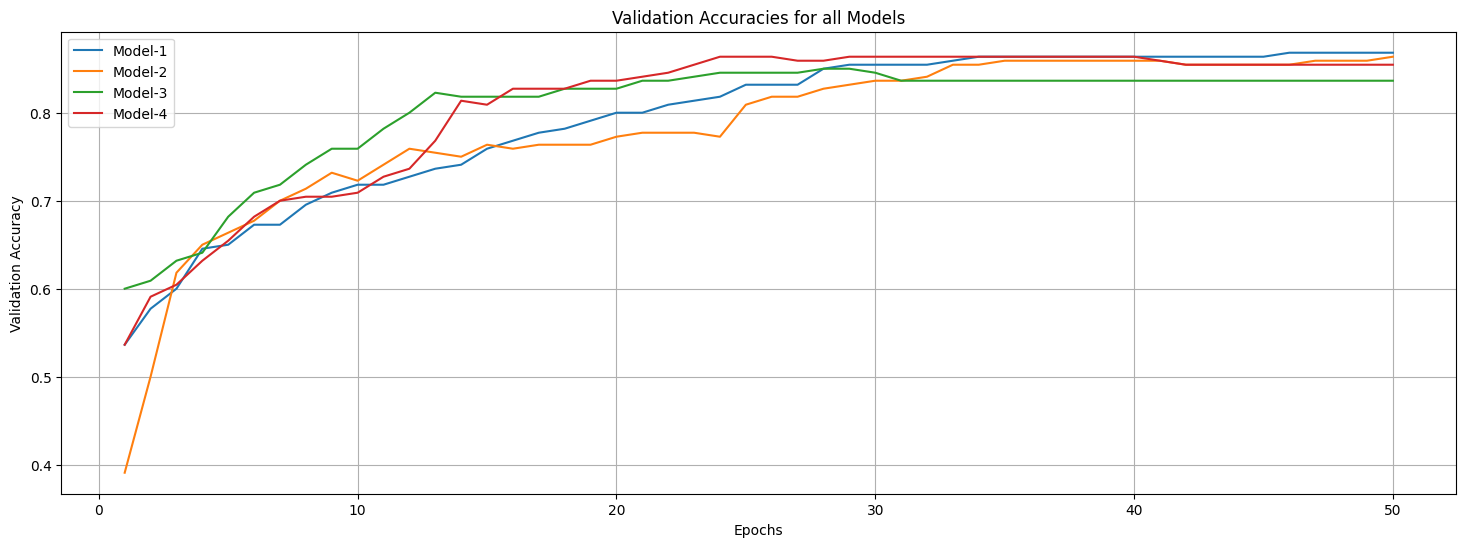

In [ ]:
# plot_for_multiple_models(histories)

plot_val_accuracies(histories)

In [ ]:
# From this we can say that model1 Can be a good Model

n_models = 5

models = [0] * n_models

dense_layers = [[8, 8], [8, 16], [16, 32], [32, 64], [64, 128]]

for i in range(n_models):
    layers = [tf.keras.layers.Input(shape=(7, ))]
    layers.append(tf.keras.layers.Dense(dense_layers[i][0], activation='relu'))
    layers.append(tf.keras.layers.Dense(dense_layers[i][1], activation='relu'))
    layers.append(tf.keras.layers.Dense(1, activation='sigmoid'))

    model = tf.keras.models.Sequential(layers)
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

    print(f"Summary of model{1} is: \n")
    model.summary()

    models[i] = model


Summary of model1 is: 



Model: "sequential_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_248 (Dense)                    │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_249 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_250 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 145 (580.00 B)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

Summary of model1 is: 



Model: "sequential_82"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_251 (Dense)                    │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_252 (Dense)                    │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_253 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

Summary of model1 is: 



Model: "sequential_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_254 (Dense)                    │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_255 (Dense)                    │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_256 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

Summary of model1 is: 



Model: "sequential_84"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_257 (Dense)                    │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_258 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_259 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

Summary of model1 is: 



Model: "sequential_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_260 (Dense)                    │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_261 (Dense)                    │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_262 (Dense)                    │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,961 (35.00 KB)

 Trainable params: 8,961 (35.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
histories = train_multiple_models(
    models=models,
    x_train=X_train1,
    y_train=y_train1,
    x_valid=X_test1,
    y_valid=y_test1,
    epochs=60,
    batch_size=BATCH_SIZE
)

Completed Training Model: 1
Executed time: 0.006662384748458862
Maximum Validation Accuracy: 0.8590909242630005
Actual Validation Accuracy: 0

Completed Training Model: 2
Executed time: 0.005669992446899414
Maximum Validation Accuracy: 0.8681818246841431
Actual Validation Accuracy: 0.8590909242630005

Completed Training Model: 3
Executed time: 0.006624634742736816
Maximum Validation Accuracy: 0.8500000238418579
Actual Validation Accuracy: 0.8681818246841431

Completed Training Model: 4
Executed time: 0.006035442352294922
Maximum Validation Accuracy: 0.8590909242630005
Actual Validation Accuracy: 0.8681818246841431

Completed Training Model: 5
Executed time: 0.00897890067100525
Maximum Validation Accuracy: 0.8545454740524292
Actual Validation Accuracy: 0.8681818246841431

model2 may be a good model


Average Validation Accuracies

Model-1: 0.6285606026649475
Model-2: 0.7566666742165883
Model-3: 0.8319697101910909
Model-4: 0.8303030411402385
Model-5: 0.8453788022200267


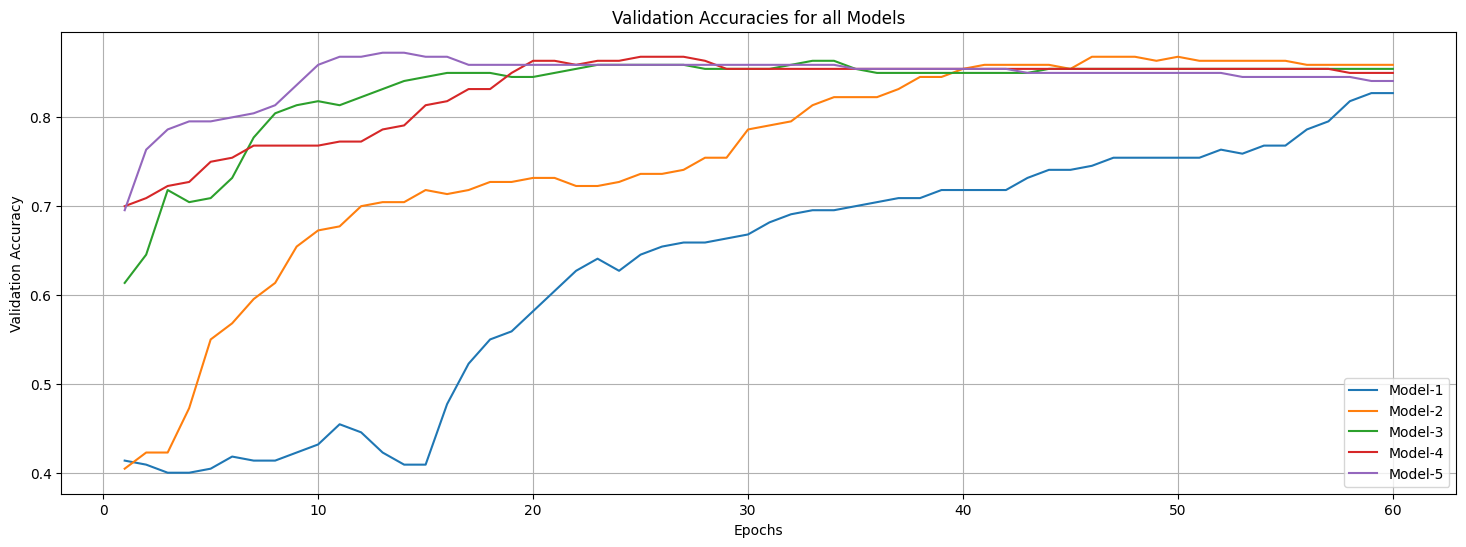

In [ ]:
plot_val_accuracies(histories)

In [ ]:
# model2 with 16 layers can be a good choice


n_models = 6

models = [0] * n_models

dropouts = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

for i in range(n_models):
    layers = [tf.keras.layers.Input(shape=(7, ))]
    layers.append(tf.keras.layers.Dense(8, activation='relu'))
    layers.append(tf.keras.layers.Dropout(dropouts[i]))
    layers.append(tf.keras.layers.Dense(16, activation='relu'))
    layers.append(tf.keras.layers.Dense(1, activation='sigmoid'))

    model = tf.keras.models.Sequential(layers)
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

    print(f"Summary of model{i+1} is: \n")
    model.summary()

    models[i] = model


Summary of model1 is: 



Model: "sequential_94"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_287 (Dense)                    │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_288 (Dense)                    │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_289 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

Summary of model2 is: 



Model: "sequential_95"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_290 (Dense)                    │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_291 (Dense)                    │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_292 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

Summary of model3 is: 



Model: "sequential_96"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_293 (Dense)                    │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_294 (Dense)                    │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_295 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

Summary of model4 is: 



Model: "sequential_97"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_296 (Dense)                    │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_297 (Dense)                    │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_298 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

Summary of model5 is: 



Model: "sequential_98"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_299 (Dense)                    │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_300 (Dense)                    │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_301 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

Summary of model6 is: 



Model: "sequential_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_302 (Dense)                    │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_303 (Dense)                    │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_304 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
histories = train_multiple_models(
    models=models,
    x_train=X_train1,
    x_valid=X_test1,
    y_train=y_train1,
    y_valid=y_test1,
    epochs=60,
    batch_size=BATCH_SIZE
)

Completed Training Model: 1
Executed time: 0.008652994871139526
Maximum Validation Accuracy: 0.8590909242630005
Actual Validation Accuracy: 0

Completed Training Model: 2
Executed time: 0.005446147203445434
Maximum Validation Accuracy: 0.8590909242630005
Actual Validation Accuracy: 0.8590909242630005

Completed Training Model: 3
Executed time: 0.006481726884841919
Maximum Validation Accuracy: 0.8409090638160706
Actual Validation Accuracy: 0.8590909242630005

Completed Training Model: 4
Executed time: 0.005893892765045166
Maximum Validation Accuracy: 0.7954545617103577
Actual Validation Accuracy: 0.8590909242630005

Completed Training Model: 5
Executed time: 0.013066567420959473
Maximum Validation Accuracy: 0.831818163394928
Actual Validation Accuracy: 0.8590909242630005

Completed Training Model: 6
Executed time: 0.011145062685012818
Maximum Validation Accuracy: 0.8045454621315002
Actual Validation Accuracy: 0.8590909242630005

model1 may be a good model


Average Validation Accuracies

Model-1: 0.640075758099556
Model-2: 0.5986363689104716
Model-3: 0.7121212124824524
Model-4: 0.5785606145858765
Model-5: 0.5862121274073918
Model-6: 0.6696969618399938


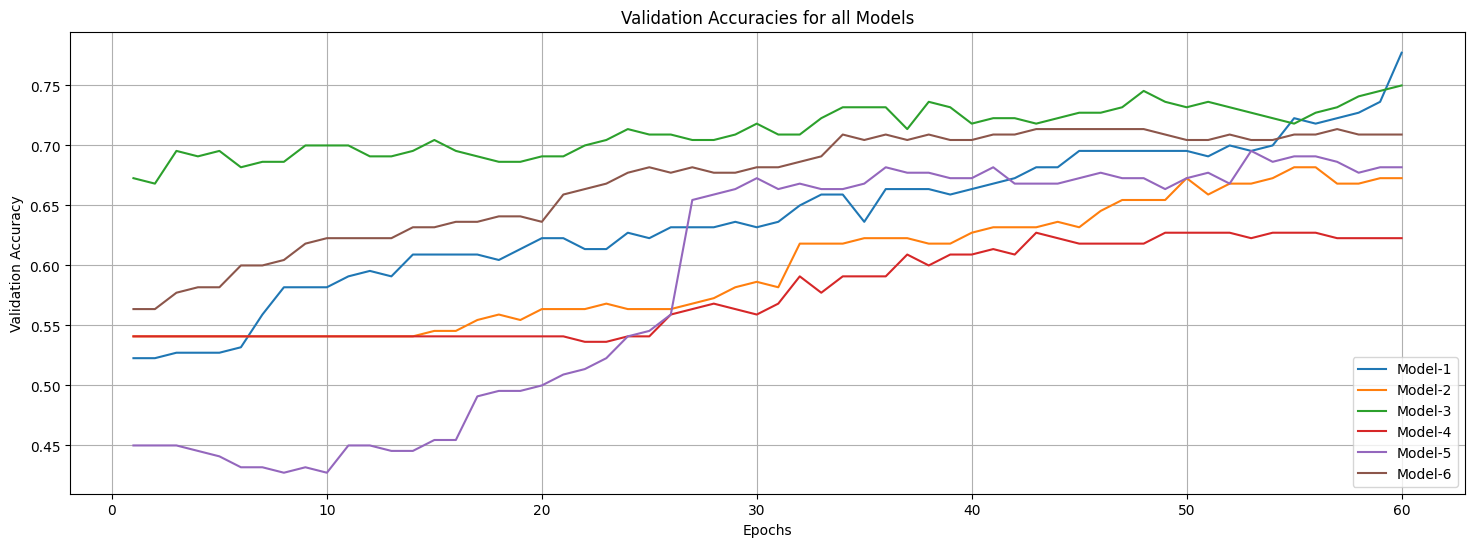

In [ ]:
plot_val_accuracies(histories)

In [ ]:
# Using a dropout is a not good option

model5 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(7, )),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model5.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

model5.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callback = MyCallback()

histories = train_multiple_models(
    models=[model5],
    x_train=X_train1,
    x_valid=X_test1,
    y_train=y_train1,
    y_valid=y_test1,
    epochs=60,
    verbose=1,
    batch_size=BATCH_SIZE
)

# histor5 = model5.fit(
#     X_train1,
#     y_train1,
#     epochs=60,
#     batch_size=BATCH_SIZE,
#     validation_data=(X_test1, y_test1),
# )

Epoch 1/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - acc: 0.4882 - loss: 0.7209 - val_acc: 0.5545 - val_loss: 0.6822
Epoch 2/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4996 - loss: 0.7087 - val_acc: 0.5545 - val_loss: 0.6791
Epoch 3/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.4902 - loss: 0.7011 - val_acc: 0.5773 - val_loss: 0.6773
Epoch 4/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.5098 - loss: 0.6926 - val_acc: 0.6182 - val_loss: 0.6750
Epoch 5/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.5156 - loss: 0.6925 - val_acc: 0.6545 - val_loss: 0.6733
Epoch 6/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.5149 - loss: 0.6922 - val_acc: 0.6682 - val_loss: 0.6718
Epoch 7/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.5590 - loss: 0.6875 - val_acc: 0.6636 - val_loss: 0.6702
Epoch 8/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.5527 - loss: 0.6853 - val_acc: 0.6773 - val_loss: 0.6684
Epoch 9/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.5622 - loss: 0.6844 - val_a

Average Validation Accuracies

Model-1: 0.7793939312299093


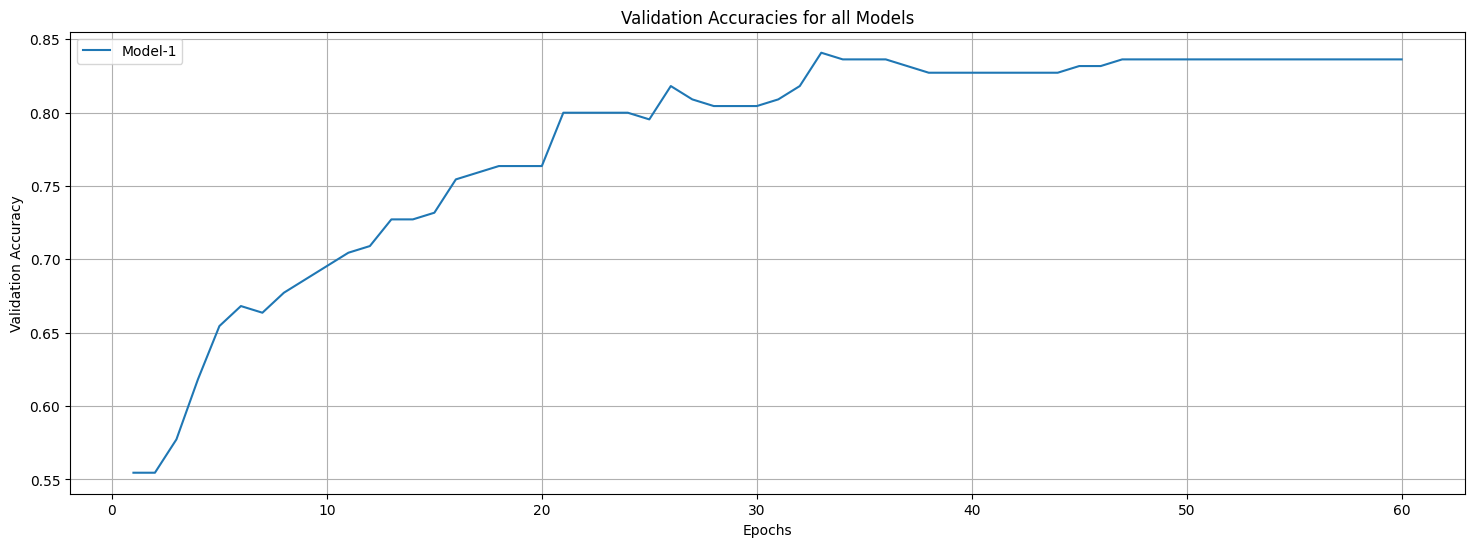

In [ ]:
plot_val_accuracies(histories)

# Testing models

In [ ]:
from operator import index
test_df = pd.read_csv('/content/test.csv')

if test_df.index.name != 'PassengerId':
    test_df.set_index('PassengerId', inplace=True)

test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
if {'Name', 'Ticket', 'Cabin'}.issubset(test_df.columns):
  test_df.drop(['Name', 'Ticket', 'Cabin'], inplace=True, axis=1)


test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [ ]:
test_df.isna().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [ ]:
# Filling missing values of 'Age' Column
age_grouped_mean = test_df.groupby(['Pclass', 'Sex'])['Age'].transform('mean')

test_df['Age'] = test_df['Age'].fillna(age_grouped_mean)

test_df.isna().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,1
Embarked,0


In [ ]:
fare_groped_mean = test_df.groupby(['Pclass', 'Sex'])['Fare'].transform('mean')


test_df['Fare'] = test_df['Fare'].fillna(fare_groped_mean)

test_df.isna().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
test_df['Sex'].value_counts()

,count
Sex,
male,266
female,152


In [ ]:
def replace_embarked(embarked):
    if embarked == 'S':
        return 0
    elif embarked == 'C':
        return 1
    elif embarked == 'Q':
        return 2
    else:
        return embarked

test_df['Embarked'] = test_df['Embarked'].apply(replace_embarked)

test_df['Embarked'].unique()

array([2, 0, 1])

In [ ]:
test_df['Sex'] = test_df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

test_df['Sex'].unique()

array([1, 0])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

test_df[['Age', 'Fare']] = scaler.fit_transform(test_df[['Age', 'Fare']])

test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,0.392121,0,0,-0.497278,2
893,3,0,1.357557,1,0,-0.512142,0
894,2,1,2.516080,0,0,-0.463967,2
895,3,1,-0.187140,0,0,-0.482341,0
896,3,0,-0.573315,1,1,-0.417360,0


In [ ]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
1,3,1,-0.549253,1,0,-0.500240,0,0
2,1,0,0.659206,1,0,0.788947,1,1
3,3,0,-0.247139,0,0,-0.486650,0,1
4,1,0,0.432620,1,0,0.422861,0,1
5,3,1,0.432620,0,0,-0.484133,0,0


In [ ]:
# Total data

# print(len(df_balanced))

final_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

final_model.fit(df_balanced, survival_balanced)

# final_model.fit(X_train1, y_train1)

# print(final_model.score(X_test1, y_test1))

if test_df.index.name != 'PassengerId':
    test_df.set_index('PassengerId', inplace=True)

final_predict = final_model.predict(test_df)


print(final_predict)

test_df.reset_index(inplace=True)

output = pd.DataFrame({'PassengerId': test_df["PassengerId"], 'Survived': final_predict})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]
Your submission was successfully saved!


1098

In [ ]:
if test_df.index.name != 'PassengerId':
    test_df.set_index('PassengerId', inplace=True)

final_model1 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(7, )),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

final_model1.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

final_model1.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
final_history1 = final_model1.fit(
    df_balanced,
    survival_balanced,
    epochs=60,
    batch_size=BATCH_SIZE
)

Epoch 1/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.5629 - loss: 0.7020
Epoch 2/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6149 - loss: 0.6807
Epoch 3/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6153 - loss: 0.6653
Epoch 4/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6228 - loss: 0.6516
Epoch 5/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6291 - loss: 0.6392
Epoch 6/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6535 - loss: 0.6278
Epoch 7/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6727 - loss: 0.6172
Epoch 8/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7001 - loss: 0.6066
Epoch 9/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6950 - loss: 0.5957
Epoch 10/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6985 - loss: 0.5846
Epoch 11/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7183 - loss: 0.5734
Epoch 12/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7523 - loss: 0.5623
Epoch 13/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [ ]:
y_train

,Survived
PassengerId,
709,1
241,0
383,0
793,0
684,0
...,...
108,1
272,1
863,1


In [ ]:
if test_df.index.name != 'PassengerId':
    test_df.set_index('PassengerId', inplace=True)

final_predict_1 = final_model1.predict(test_df)

final_predict_1 = final_predict_1.reshape(-1)

final_predict_1 = np.where(final_predict_1 > 0.5, 1, 0)

test_df.reset_index(inplace=True)

output = pd.DataFrame({'PassengerId': test_df["PassengerId"], 'Survived': final_predict_1})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Your submission was successfully saved!


In [ ]:
df_balanced.isna().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
random_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(7,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

random_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

random_model.summary()

print()

random_history = random_model.fit(
    df_balanced,
    survival_balanced,
    epochs=60,
    batch_size=BATCH_SIZE
)

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,849 (11.13 KB)

 Trainable params: 2,849 (11.13 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - acc: 0.5153 - loss: 0.6872
Epoch 2/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.5989 - loss: 0.6647
Epoch 3/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.6681 - loss: 0.6339
Epoch 4/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.6600 - loss: 0.6246
Epoch 5/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.6814 - loss: 0.6054
Epoch 6/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7073 - loss: 0.5837
Epoch 7/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.7183 - loss: 0.5863
Epoch 8/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.6924 - loss: 0.5719
Epoch 9/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.7395 - loss: 0.5667
Epoch 10/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7227 - loss: 0.5609
Epoch 11/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7336 - loss: 0.5647
Epoch 12/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7390 - loss: 0.5641
Epoch 13/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

In [ ]:
if test_df.index.name != 'PassengerId':
    test_df.set_index('PassengerId', inplace=True)

final_predict_2 = random_model.predict(test_df)

final_predict_2 = final_predict_2.reshape(-1)

final_predict_2 = np.where(final_predict_2 > 0.5, 1, 0)

test_df.reset_index(inplace=True)

output = pd.DataFrame({'PassengerId': test_df["PassengerId"], 'Survived': final_predict_2})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Your submission was successfully saved!


In [ ]:
from xgboost import XGBClassifier

model6 = XGBClassifier(random_state=42)
model6.fit(df_balanced, survival_balanced)
# predictions = model.predict(X_test)
# print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
if test_df.index.name != 'PassengerId':
    test_df.set_index('PassengerId', inplace=True)

final_predict_3 = model6.predict(test_df)

final_predict_3 = final_predict_3.reshape(-1)

final_predict_3 = np.where(final_predict_3 > 0.5, 1, 0)

test_df.reset_index(inplace=True)

output = pd.DataFrame({'PassengerId': test_df["PassengerId"], 'Survived': final_predict_3})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
